In [1]:
# Importing required libraries and their associated methods
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline 
digits = load_digits()

In [3]:
# Determining the total number of images and labels
print("Image data shape:", digits.data.shape)
print("label data shape:", digits.target.shape)

Image data shape: (1797, 64)
label data shape: (1797,)


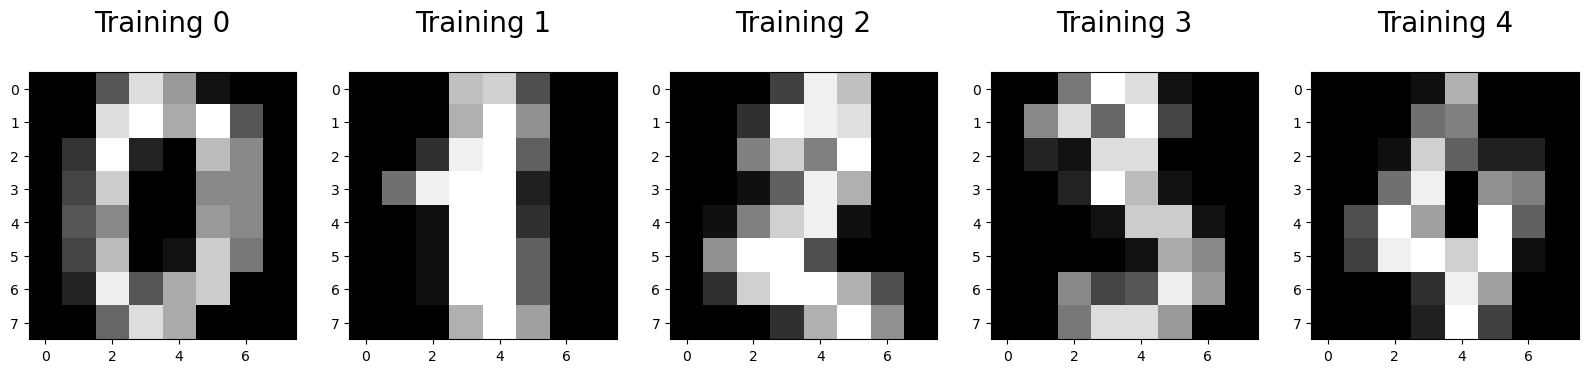

In [13]:
# Displaying some of images and labels
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap='gray')
    plt.title('Training %i\n'%label, fontsize=20)

In [15]:
# Dividing the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=42)

In [17]:
x_train.shape

(1383, 64)

In [19]:
x_test.shape

(414, 64)

In [21]:
y_train.shape

(1383,)

In [23]:
y_test.shape

(414,)

In [27]:
# Making an instance of the model and training it
from sklearn.linear_model import LogisticRegression
LogisticRegr = LogisticRegression()
LogisticRegr.fit(x_train,y_train)

/home/mukiiri/Downloads/home/mukiiri/Documents/pandas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
LogisticRegr.predict(x_test[0].reshape(1, -1))

array([6])

In [35]:
LogisticRegr.predict(x_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [37]:
# Predicting for the entire dataset
predictions = LogisticRegr.predict(x_test)

In [41]:
# Determining the accuracy of the model
score = LogisticRegr.score(x_test ,y_test)
score

0.9734299516908212

Text(0.5, 1.0, 'Accuracy Score: 0.9734299516908212')

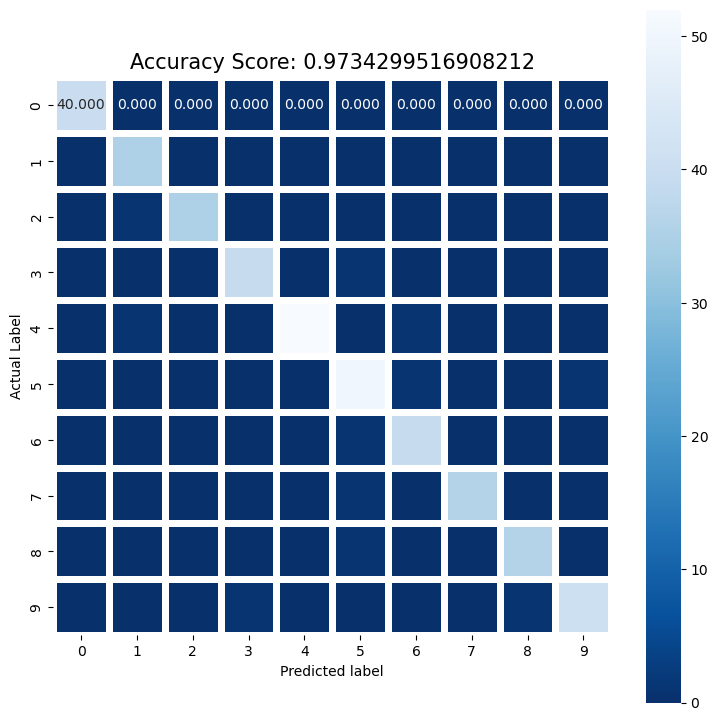

In [45]:
# Representing the confusion matrix in a heatmap
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=5, square=True, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

In [47]:
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 52,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 36,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 41]])

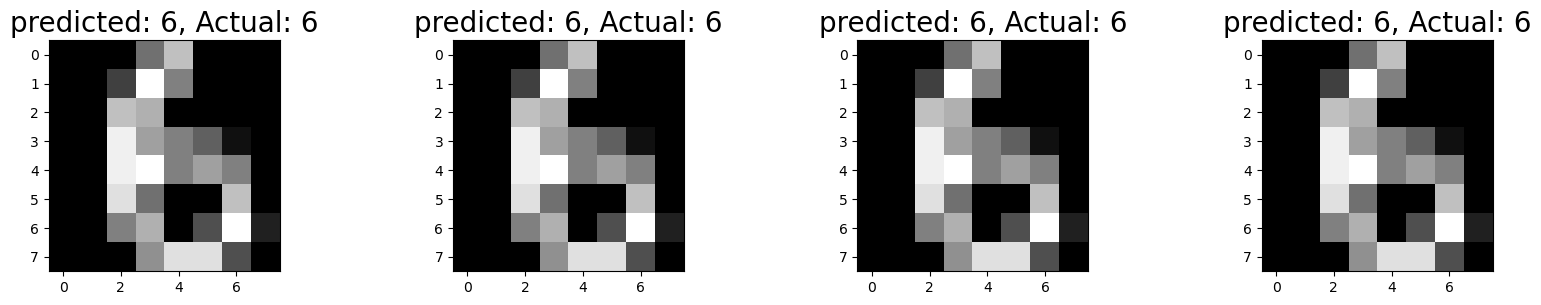

In [49]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index ++1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)),cmap=plt.cm.gray)
    plt.title('predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize=20)